# Makine Öğrenmesi 101

## Basit Tanımlar

### Örnek Senaryo: Not Ortalamaları ile Başarı Tespiti

Bir okulda öğrencilerin not ortalamaları ve başarı durumları (başarılı/başarısız) veritabanında tutulmaktadır. Öğrencinin herhangi bir dersten başarılı olabilmesi için:

- Vize sınavına katılmalı ve en az **30** puan almalıdır. (Vize puanı) Nihai başarı notunun **%35**'idir. Sadece sınava katılmış olması, sınavdan aldığı puanın %35'ı alındıktan sonraki haline 4 puan ekler.
- Final sınavına katılmalı ve en az **40** puan almalıdır. (Final puanı) Nihai başarı notunun **%55**'idir. Sadece sınava katılmış olması, sınavdan aldığı puanın %55'ı alındıktan sonraki haline 6 puan ekler.
- Nihai başarı notu en az **70** olmalıdır.

### Algoritma nedir?

Algoritma, belirli bir problemi çözmek için tasarlanmış bir adımlar kümesidir. Yukarıdaki örnek senaryoya göre bir uygulama yazılmak istenirse, 2 farklı algoritma takip edilebilir:

1. Öğrencinin not ortalamasına göre başarılı/başarısız olup olmadığını belirleyen bir fonksiyon yazılabilir. Bu fonksiyon, öğrencinin sınav puanlarını alır ve başarılı/başarısız olup olmadığını belirler. Bunun için tüm senaryonun bilinmesi gerekir. Ve tüm parametreler bu senaryoya göre fonksiyon yazılırken belirtilir.
2. Makinenin kendi kendine parametreleri öğrenmesi sağlanabilir. Bu durumda, öğrencilerin not ortalamaları ve başarı durumları veritabanından alınır ve makinenin nasıl öğreneceğini bir fonksiyon yazılır. Bu fonksiyon doğru tasarlanırsa ve yeterince veri sağlanırsa, makine öğrenmesi algoritması, fonksiyonu yazarken belirtmediğimiz parametreleri de öğrenir ve verilen verilere göre başarılı/başarısız olup olmadığını belirler.

### Makine Öğrenmesi nedir?

Makine öğrenmesi, bir algoritmanın belirli bir problemi çözmek için tasarlanmış bir adımlar kümesi yerine, veriye dayalı olarak öğrenmesidir. Makine öğrenmesi algoritmaları, veri setlerini kullanarak öğrenir ve bu verilere göre tahminler yapar. Yukarıdaki örnek senaryoya göre, makine öğrenmesi algoritmaları kullanılarak öğrencilerin not ortalamalarına göre başarılı/başarısız olup olmadığını belirleyen bir model oluşturulabilir.



In [2]:
VIZE_ORAN = 0.35
FINAL_ORAN = 0.65
GECME_NOTU = 35

Bu parametreleri belirlemenin tek yolu yönetmelikten okumak değildir. Eğer elimizde yeterince veri varsa, bu parametreleri veriye bakarak da istatisliksel olarak öğrenebiliriz. İşte **Makine Öğrenmesi** denen şey tam olarak budur. Yazılacak programın şekli bu parametlerin nasıl belirleneceği netleştikten sonra tamamen aynı olacaktır.

In [3]:
def puan_hesapla(vize, final):
    ortalama = vize * VIZE_ORAN + final * FINAL_ORAN
    if ortalama >= GECME_NOTU:
        return "Geçti"
    else:
        return "Kaldı"

In [4]:
vize = float(input("Vize notunuzu girin: "))
final = float(input("Final notunuzu girin: "))

sonuc = puan_hesapla(vize, final)
print("İşlem sonucu: ", sonuc)

İşlem sonucu:  Kaldı


Öncelikle 10000 tane rastgele öğrenci oluşturalım ve yönetmelikten okunarak oluşturulan parametrelerle başarı durumlarını belirleyelim. Bu öğrencilerin verilerini tutmak için `pandas` kütüphanesini kullanacağız. Rastgele puanlar için `numpy` kütüphanesini kullanacağız.

In [219]:
import pandas as pd
import numpy as np

# Öncelikle Vize Final ve Başarı durumlarını içeren bir liste oluşturalım.
ogrenciler = []
for i in range(10000):
    # 0-100 arasında rastgele bir sayı üretelim. Ondalklı kısmı 2 basamak olacak şekilde.
    vize = round(np.random.random() * 100, 2)
    final = round(np.random.random() * 100, 2)

    basari_durumu = puan_hesapla(vize, final)

    ogrenciler.append({"Vize": vize, "Final": final, "Başarı Durumu": basari_durumu})

# Listeyi DataFrame'e çevirelim.
df = pd.DataFrame(ogrenciler)
df.head(20)

,Vize,Final,Başarı Durumu
0,69.60,36.84,Kaldı
1,89.13,82.38,Geçti
2,65.27,77.57,Geçti
3,96.82,70.18,Geçti
4,33.87,93.07,Geçti
5,83.15,65.86,Geçti
6,81.17,77.27,Geçti
7,92.26,41.27,Kaldı
8,50.33,56.42,Kaldı
9,66.17,72.29,Geçti


In [220]:
vizeden_kalanlar = df[df["Vize"] < VIZE_BARAJ].count()["Vize"]
finalden_kalanlar = df[df["Final"] < FINAL_BARAJ].count()["Final"]
toplam_kalan = vizeden_kalanlar + finalden_kalanlar
toplam_gecen = df.count()["Vize"] - toplam_kalan

print(f"""Vizeden kalan öğrenci: {vizeden_kalanlar} ({vizeden_kalanlar / 100:.2f}%)
Finalden kalan öğrenci: {finalden_kalanlar} ({finalden_kalanlar / 100:.2f}%)
Toplam kalan öğrenci: {toplam_kalan} ({toplam_kalan / 100:.2f}%)
      """)

Vizeden kalan öğrenci: 913 (9.13%)
Finalden kalan öğrenci: 1889 (18.89%)
Toplam kalan öğrenci: 2802 (28.02%)
      


### Veriyi Görseleştirme

Öğrencilerin vizeleri ve final notlarına göre başarılı/başarısız olup olmadıklarını görselleştirelim. Görselleştirme yaparken  200 öğrenciyi seçeceğiz ve x ekseninde vize notlarını, y ekseninde final notlarını kullanacağımız bir koordinat sistemi oluşturacağız. Bu koordinat sisteminde başarılı olanlar yeşil, başarısız olanlar kırmızı noktalarla gösterilecektir. Bu görselleştirmeyi yapmak için `matplotlib` kütüphanesini kullanacağız.

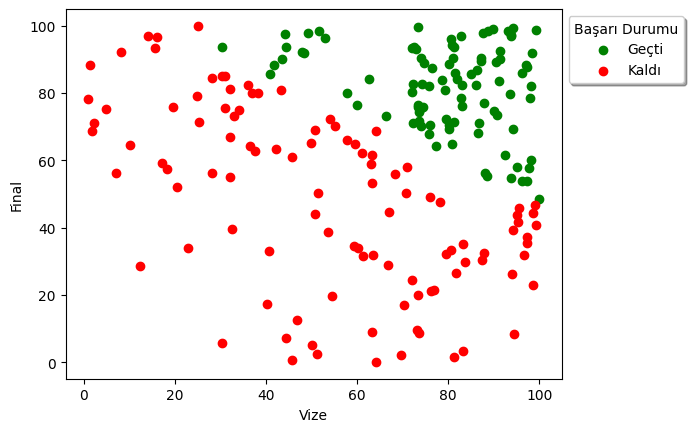

In [221]:
import matplotlib.pyplot as plt

ornek = df.sample(200)

# Başarılı olanlar
basarili = ornek[ornek["Başarı Durumu"] == "Geçti"]
plt.scatter(basarili["Vize"], basarili["Final"], color="green", label="Geçti")

# Başarısız olanlar
basarisiz = ornek[ornek["Başarı Durumu"] == "Kaldı"]
plt.scatter(basarisiz["Vize"], basarisiz["Final"], color="red", label="Kaldı")

plt.xlabel("Vize")
plt.ylabel("Final")
plt.legend(
    title="Başarı Durumu",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    shadow=True,
    ncol=1,
)
plt.show()


### Makine Öğrenmesi

Şimdi hiçbir parametreyi bilmediğimizi yani yönetmelikten haberimiz olmadığını varsayalım ve bu verileri kullanarak bir makine öğrenmesi modeli oluşturalım. Bu model, öğrencilerin vize ve final notlarına göre başarılı/başarısız olup olmadığını belirleyecektir. Bu modeli en temelden başlayarak oluşturacağız. Bu işlem için bir yapay sinir ağı kullanacağız. Yapay sinir ağları, insan beyninin çalışma şeklini taklit eden bir algoritmadır. Bu algoritma, verileri öğrenerek ve bu verilere göre tahminler yaparak öğrenir. Modeli en temelden herhangi bir kütüphane kullanmayacağız. Sinir ağını kendimiz oluşturacağız. Modelimizde 2 giriş ve 1 çıkış sinir hücresi olacak. Girişler vize ve final notları, çıkış ise başarılı/başarısız olma durumu olacak.

Parametrelerimizin makine öğrenmesi bağlamındaki karşılıklarını şu şekilde belirleyebiliriz:

- **VIZE_BARAJ ve FINAL_BARAJ**: Giriş verilerinin (vize ve final notları) başarılı/başarısız olarak sınıflandırılması için belirlenen eşik değerleridir. Bu değerler, bir öğrencinin başarılı sayılması için minimum gereksinimleri ifade eder.
- **VIZE_ORANI ve FINAL_ORANI**: Bu oranlar, modeldeki girişlerin ağırlıkları (weights) olarak düşünülebilir. Her iki notun toplam başarıya katkısını belirler.
- **VIZE_EK_PUAN ve FINAL_EK_PUAN**: Bias terimi olarak düşünülebilir. Bu değerler, her bir notun üzerine eklenerek hesaplamalarda belirli bir kaymayı sağlar.
- **ORTALAMA_BARAJ**: Bu, nihai başarı notu olarak belirlenen threshold değeridir. Bir öğrencinin başarılı sayılabilmesi için toplam notun bu değeri geçmesi gerekir.


1. **Giriş Katmanı**: 2 nöron (vize ve final notları)
2. **Ağırlıklar ve Bias Terimleri**: Vize ve final oranları ve ek puanları
3. **Çıkış Katmanı**: 1 nöron (başarı durumu)
4. **Activation Fonksiyonu**: Basit bir eşik fonksiyonu (threshold function)

In [282]:
# parametrelere rastgele başlangıç değerlerini atayalım. Rastgele atanıp bırakılabilirdi ama biz bazı varsayımlarla ufak bir düzenleme/kısıtlama yapalım.
# bias_vize + bias_final = 10
# weight_vize + weight_final = 0.9
# ortalamanın 100 üzerine çıkmasını engellemek için activation_vize + activation_final = 90
# Burada başlangıç değerleri 0 olarak da atanabilirdi.
weight_vize = round(np.random.random() * 0.9, 2)
weight_final = round(0.9 - weight_vize, 2)
bias_vize = np.random.randint(10)
bias_final = 10 - bias_vize

activation_result = np.random.randint(100)
activation_vize = np.random.randint(90)
activation_final = 90 - activation_vize

print(f"""Başlangıçtaki rastgele değerler:
- Vize Barajı: {activation_vize}
- Final Barajı: {activation_final}
- Vize Ağırlığı: {weight_vize}
- Final Ağırlığı: {weight_final}
- Vize Ek Puanı: {bias_vize}
- Final Ek Puanı: {bias_final}
- Başarı Barajı: {activation_result}
""")

Başlangıçtaki rastgele değerler:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: 0.31
- Final Ağırlığı: 0.59
- Vize Ek Puanı: 8
- Final Ek Puanı: 2
- Başarı Barajı: 1



In [284]:
# Bu rasgele değerlerle tahmin etme fonksiyonunu tekrar yazalım.
def vize_puan_hesapla_makine(vize):
    if vize < activation_vize:
        vize = 0
    return vize * weight_vize + bias_vize

def final_puan_hesapla_makine(final):
    if final < activation_final:
        final = 0
    return final * weight_final + bias_final

def puan_hesapla_makine(vize, final):
    ortalama = vize_puan_hesapla_makine(vize) + final_puan_hesapla_makine(final)
    if ortalama < activation_result:
        return "Kaldı"
    else:
        return "Geçti"

In [287]:
# Öğrenmenin kaç adım süreceğini belirleyelim.
adim = 10 # epoch sayısı, tüm veri setinin model tarafından öğrenme için kullanılma sayısı
ogrenme_orani = 1 # learning rate, her yanlış tahminden sonra ağırlıkların ne kadar değişeceğini belirler

for i in range(adim):
    # Veri setindeki her bir öğrenci için
    for index, ogrenci in df.iterrows():
        vize = ogrenci["Vize"]
        final = ogrenci["Final"]
        basari_durumu = ogrenci["Başarı Durumu"]

        # Tahmin et
        tahmin = puan_hesapla_makine(vize, final)

        # Yanlış tahmin edilen durumlar için ağırlıkları güncelle
        if basari_durumu != tahmin:
            hesaplanan_vize = vize_puan_hesapla_makine(vize)
            hesaplanan_final = final_puan_hesapla_makine(final)
            hesaplanan_ortalama = hesaplanan_vize + hesaplanan_final

            # Öncelikle hangi yönde yanıldığımızı belirleyelim.
            # Eğer öğrenci geçtiyse ve biz kaldı dediysek, ağırlıkları artırmalıyız.
            # Eğer öğrenci kaldıysa ve biz geçti dediysek, ağırlıkları azaltmalıyız.

            if basari_durumu == "Geçti":
                

    print(f"""{i}. Adım sonrası ağırlıklar:
- Vize Barajı: {activation_vize}
- Final Barajı: {activation_final}
- Vize Ağırlığı: {weight_vize}
- Final Ağırlığı: {weight_final}
- Vize Ek Puanı: {bias_vize}
- Final Ek Puanı: {bias_final}
- Başarı Barajı: {activation_result}
""")

print(f"""Eğitim sonrası ağırlıklar:
- Vize Barajı: {activation_vize}
- Final Barajı: {activation_final}
- Vize Ağırlığı: {weight_vize}
- Final Ağırlığı: {weight_final}
- Vize Ek Puanı: {bias_vize}
- Final Ek Puanı: {bias_final}
- Başarı Barajı: {activation_result}
""")


        


0. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Puanı: nan
- Final Ek Puanı: nan
- Başarı Barajı: -5240

1. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Puanı: nan
- Final Ek Puanı: nan
- Başarı Barajı: -10481

2. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Puanı: nan
- Final Ek Puanı: nan
- Başarı Barajı: -15722

3. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Puanı: nan
- Final Ek Puanı: nan
- Başarı Barajı: -20963

4. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Puanı: nan
- Final Ek Puanı: nan
- Başarı Barajı: -26204

5. Adım sonrası ağırlıklar:
- Vize Barajı: 33
- Final Barajı: 57
- Vize Ağırlığı: nan
- Final Ağırlığı: nan
- Vize Ek Pua